Written by WeiBin Wang,

Student number: 99153623**3**

In [177]:
!pip install pycaret

In [178]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# **Getting the Data**

In [179]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')

In [180]:
df

M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4171  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 9 columns]

In [181]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

In [182]:
df['Rings'] = df['Rings'] + 1.5
df

Sex  Length  Diameter  ...  Viscera_weight  Shell_weight  Rings
0      M   0.350     0.265  ...          0.0485        0.0700    8.5
1      F   0.530     0.420  ...          0.1415        0.2100   10.5
2      M   0.440     0.365  ...          0.1140        0.1550   11.5
3      I   0.330     0.255  ...          0.0395        0.0550    8.5
4      I   0.425     0.300  ...          0.0775        0.1200    9.5
...   ..     ...       ...  ...             ...           ...    ...
4171   F   0.565     0.450  ...          0.2390        0.2490   12.5
4172   M   0.590     0.440  ...          0.2145        0.2605   11.5
4173   M   0.600     0.475  ...          0.2875        0.3080   10.5
4174   F   0.625     0.485  ...          0.2610        0.2960   11.5
4175   M   0.710     0.555  ...          0.3765        0.4950   13.5

[4176 rows x 9 columns]

In [183]:
df.shape

(4176, 9)

In [184]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3758, 9)
Unseen Data For Predictions: (418, 9)


# **Setting up Environment in PyCaret**

In [185]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Rings', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target             Rings
2                            Original Data         (3758, 9)
3                           Missing Values             False
4                         Numeric Features                 7
5                     Categorical Features                 1
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (2630, 10)
10                    Transformed Test Set        (1128, 10)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              2a26
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

# **Comparing All Models**

In [186]:
best = compare_models(exclude = ['ransac'])

Model     MAE      MSE    RMSE      R2  \
gbr           Gradient Boosting Regressor  1.5468   4.8618  2.2036  0.5222   
lr                      Linear Regression  1.6036   4.9748  2.2276  0.5134   
br                         Bayesian Ridge  1.6039   4.9771  2.2282  0.5132   
lar                Least Angle Regression  1.6043   4.9787  2.2285  0.5130   
rf                Random Forest Regressor  1.5776   4.9885  2.2318  0.5086   
ridge                    Ridge Regression  1.6093   5.0360  2.2414  0.5075   
et                  Extra Trees Regressor  1.5860   5.0126  2.2371  0.5075   
huber                     Huber Regressor  1.5631   5.1288  2.2611  0.4999   
lightgbm  Light Gradient Boosting Machine  1.6008   5.1469  2.2670  0.4943   
knn                 K Neighbors Regressor  1.6073   5.2706  2.2933  0.4836   
omp           Orthogonal Matching Pursuit  1.8360   6.4726  2.5409  0.3679   
par          Passive Aggressive Regressor  1.9689   7.1249  2.6504  0.3016   
ada                    AdaBoost Regressor  2.3115   7.6264  2.7590  0.2456   
dt                Decision Tree Regressor  2.0856   9.1304  3.0177  0.0927   
en                            Elastic Net  2.2432   9.5701  3.0861  0.0712   
lasso                    Lasso Regression  2.3446  10.3329  3.2072 -0.0034   
llar         Lasso Least Angle Regression  2.3446  10.3329  3.2072 -0.0034   
dummy                     Dummy Regressor  2.3446  10.3329  3.2072 -0.0034   

           RMSLE    MAPE  TT (Sec)  
gbr       0.1555  0.1312     0.321  
lr        0.1641  0.1370     0.303  
br        0.1641  0.1371     0.016  
lar       0.1642  0.1371     0.017  
rf        0.1585  0.1344     1.152  
ridge     0.1641  0.1377     0.016  
et        0.1587  0.1350     0.745  
huber     0.1640  0.1291     0.068  
lightgbm  0.1602  0.1351     0.129  
knn       0.1627  0.1351     0.066  
omp       0.1842  0.1583     0.015  
par       0.2009  0.1690     0.020  
ada       0.2096  0.2172     0.166  
dt        0.2108  0.1769     0.027  
en        0.2379  0.2086     0.018  
lasso     0.2487  0.2195     0.017  
llar      0.2487  0.2195     0.015  
dummy     0.2487  0.2195     0.014

# **Create a Model**

In [187]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
lightgbm    Light Gradient Boosting Machine  ...   True
dummy                       Dummy Regressor  ...   True

[24 rows x 3 columns]

**AdaBoost Regressor**

In [188]:
ada = create_model('ada')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.9888  6.2809  2.5062  0.2998  0.1878  0.1842
1     2.3266  7.7463  2.7832  0.3249  0.2105  0.2202
2     2.2515  6.9313  2.6327  0.3033  0.2054  0.2162
3     2.4210  8.3691  2.8929  0.3140  0.2169  0.2251
4     2.4641  8.3734  2.8937 -0.0877  0.2185  0.2316
5     2.3395  7.7245  2.7793  0.2268  0.2079  0.2160
6     2.3421  7.6611  2.7679  0.2585  0.2109  0.2200
7     2.1818  7.0118  2.6480  0.3808  0.1998  0.1996
8     2.4209  8.2423  2.8709  0.1072  0.2204  0.2323
9     2.3789  7.9236  2.8149  0.3283  0.2183  0.2268
Mean  2.3115  7.6264  2.7590  0.2456  0.2096  0.2172
SD    0.1335  0.6537  0.1204  0.1316  0.0096  0.0142

In [189]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


**Light Gradient Boosting Machine**

In [190]:
lightgbm = create_model('lightgbm')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.5636  4.6496  2.1563  0.4816  0.1568  0.1360
1     1.6019  5.3058  2.3034  0.5376  0.1577  0.1371
2     1.4965  4.4432  2.1079  0.5534  0.1527  0.1277
3     1.7175  5.9186  2.4328  0.5149  0.1676  0.1426
4     1.5708  4.8280  2.1973  0.3728  0.1562  0.1335
5     1.6189  5.1637  2.2724  0.4832  0.1598  0.1350
6     1.5957  5.1269  2.2643  0.5038  0.1593  0.1323
7     1.5849  5.2801  2.2978  0.5338  0.1584  0.1261
8     1.6377  5.3841  2.3204  0.4168  0.1691  0.1438
9     1.6209  5.3694  2.3172  0.5448  0.1648  0.1367
Mean  1.6008  5.1469  2.2670  0.4943  0.1602  0.1351
SD    0.0540  0.3986  0.0881  0.0557  0.0050  0.0053

**Decision Tree**

In [191]:
dt = create_model('dt')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     2.1027   9.0837  3.0139 -0.0127  0.2120  0.1838
1     2.1331  10.2548  3.2023  0.1063  0.2196  0.1799
2     2.0190   8.7034  2.9502  0.1251  0.2071  0.1720
3     2.1939   9.8745  3.1424  0.1906  0.2179  0.1866
4     2.1635  10.2471  3.2011 -0.3311  0.2176  0.1821
5     1.9506   7.8973  2.8102  0.2096  0.1982  0.1649
6     2.0456   8.6464  2.9405  0.1632  0.2030  0.1743
7     1.9430   7.6844  2.7721  0.3215  0.1955  0.1540
8     2.2205  10.2814  3.2065 -0.1137  0.2258  0.1956
9     2.0837   8.6312  2.9379  0.2683  0.2115  0.1758
Mean  2.0856   9.1304  3.0177  0.0927  0.2108  0.1769
SD    0.0912   0.9311  0.1547  0.1860  0.0093  0.0111

**Gradient Boosting Regressor**

In [192]:
gbr = create_model('gbr')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.4524  4.3741  2.0914  0.5124  0.1493  0.1263
1     1.5862  4.9850  2.2327  0.5656  0.1540  0.1365
2     1.4553  4.2982  2.0732  0.5679  0.1492  0.1249
3     1.6295  5.3252  2.3076  0.5635  0.1589  0.1352
4     1.5143  4.4407  2.1073  0.4231  0.1516  0.1304
5     1.6046  5.1850  2.2771  0.4810  0.1588  0.1339
6     1.5947  4.9252  2.2193  0.5233  0.1562  0.1333
7     1.5460  5.1363  2.2663  0.5465  0.1552  0.1240
8     1.5402  4.9886  2.2335  0.4596  0.1632  0.1365
9     1.5447  4.9600  2.2271  0.5795  0.1590  0.1308
Mean  1.5468  4.8618  2.2036  0.5222  0.1555  0.1312
SD    0.0569  0.3424  0.0785  0.0501  0.0044  0.0045

# **Tune a Model**
**AdaBoost Regressor**

In [193]:
tuned_ada = tune_model(ada)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.7471  5.4538  2.3353  0.3920  0.1687  0.1549
1     1.8301  5.8222  2.4129  0.4926  0.1730  0.1622
2     1.7705  5.2853  2.2990  0.4687  0.1705  0.1569
3     1.9153  6.6882  2.5862  0.4518  0.1813  0.1632
4     1.7854  5.1410  2.2674  0.3322  0.1684  0.1596
5     1.9120  6.4634  2.5423  0.3531  0.1816  0.1657
6     1.8635  5.7287  2.3935  0.4456  0.1738  0.1617
7     1.8096  5.8012  2.4086  0.4877  0.1729  0.1533
8     1.7486  5.4566  2.3359  0.4089  0.1731  0.1579
9     1.8579  6.0007  2.4496  0.4913  0.1792  0.1640
Mean  1.8240  5.7841  2.4031  0.4324  0.1742  0.1599
SD    0.0591  0.4700  0.0968  0.0553  0.0046  0.0039

**Gradient Boosting Regressor**

In [194]:
tuned_gbr = tune_model(gbr)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.4997  4.5536  2.1339  0.4924  0.1548  0.1330
1     1.6580  5.4791  2.3407  0.5225  0.1667  0.1470
2     1.5128  4.6146  2.1482  0.5361  0.1576  0.1347
3     1.7833  6.3917  2.5282  0.4761  0.1753  0.1505
4     1.4690  4.3532  2.0864  0.4345  0.1522  0.1291
5     1.6355  5.3956  2.3229  0.4599  0.1640  0.1409
6     1.6597  5.2022  2.2808  0.4965  0.1635  0.1420
7     1.6497  5.6632  2.3797  0.4999  0.1669  0.1367
8     1.5451  4.8822  2.2096  0.4711  0.1625  0.1385
9     1.6643  5.5815  2.3625  0.5268  0.1718  0.1456
Mean  1.6077  5.2117  2.2793  0.4916  0.1635  0.1398
SD    0.0925  0.5894  0.1285  0.0303  0.0068  0.0064

**Light Gradient Boosting Machine**

In [195]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [196]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)


MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.6540  4.9520  2.2253  0.4479  0.1637  0.1448
1     1.6537  5.4662  2.3380  0.5236  0.1616  0.1424
2     1.5164  4.7215  2.1729  0.5254  0.1588  0.1304
3     1.7328  5.8597  2.4207  0.5197  0.1686  0.1457
4     1.6564  5.2437  2.2899  0.3188  0.1638  0.1421
5     1.7158  5.6231  2.3713  0.4372  0.1696  0.1452
6     1.5883  5.1878  2.2777  0.4979  0.1619  0.1326
7     1.6298  5.4394  2.3322  0.5197  0.1610  0.1295
8     1.7625  5.8394  2.4165  0.3674  0.1783  0.1556
9     1.6633  5.5644  2.3589  0.5283  0.1693  0.1413
Mean  1.6573  5.3897  2.3203  0.4686  0.1657  0.1410
SD    0.0675  0.3488  0.0757  0.0707  0.0055  0.0076

In [197]:
print(tuned_lightgbm)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


**Decision Tree**

In [198]:
tuned_dt = tune_model(dt)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.5019  4.9106  2.2160  0.4525  0.1604  0.1268
1     1.6274  5.9544  2.4402  0.4811  0.1701  0.1370
2     1.5456  5.1416  2.2675  0.4832  0.1647  0.1286
3     1.6977  6.4439  2.5385  0.4718  0.1753  0.1354
4     1.5000  5.1625  2.2721  0.3294  0.1604  0.1231
5     1.5323  5.6198  2.3706  0.4375  0.1662  0.1240
6     1.6578  6.1274  2.4754  0.4070  0.1730  0.1330
7     1.6274  6.5399  2.5573  0.4225  0.1766  0.1248
8     1.4525  5.0342  2.2437  0.4547  0.1665  0.1243
9     1.5913  6.1473  2.4794  0.4788  0.1776  0.1286
Mean  1.5734  5.7082  2.3861  0.4418  0.1691  0.1286
SD    0.0750  0.5813  0.1219  0.0448  0.0061  0.0047

# **Plot Models**
**Residual Plot**

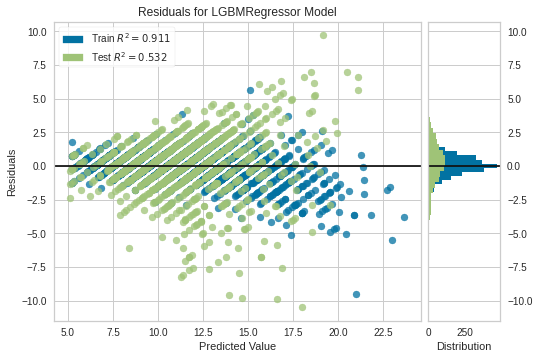

In [199]:
plot_model(tuned_lightgbm)

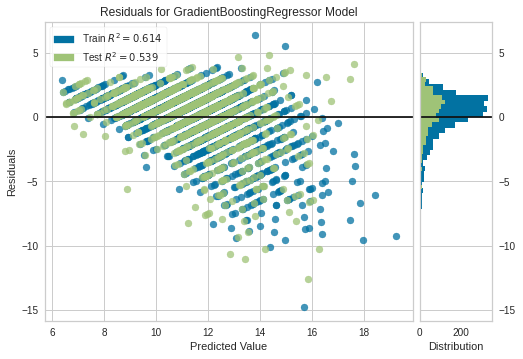

In [200]:
plot_model(tuned_gbr)

**Prediction Error Plot**

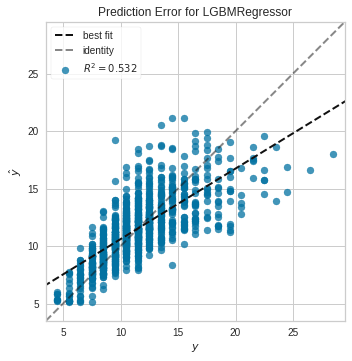

In [201]:
plot_model(tuned_lightgbm, plot = 'error')

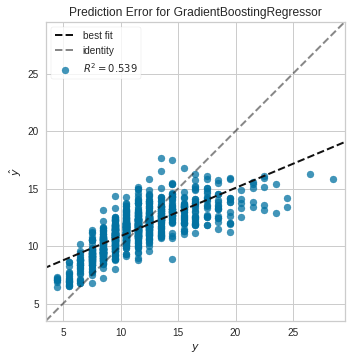

In [202]:
plot_model(tuned_gbr, plot = 'error')

**Feature Importance Plot**

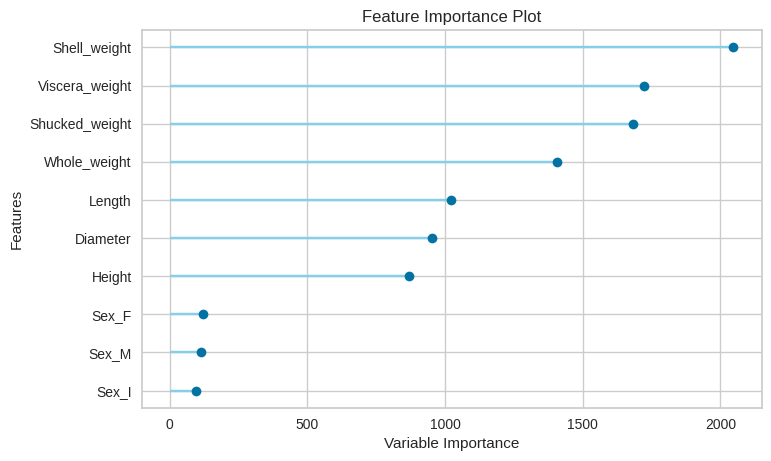

In [203]:
plot_model(tuned_lightgbm, plot='feature')

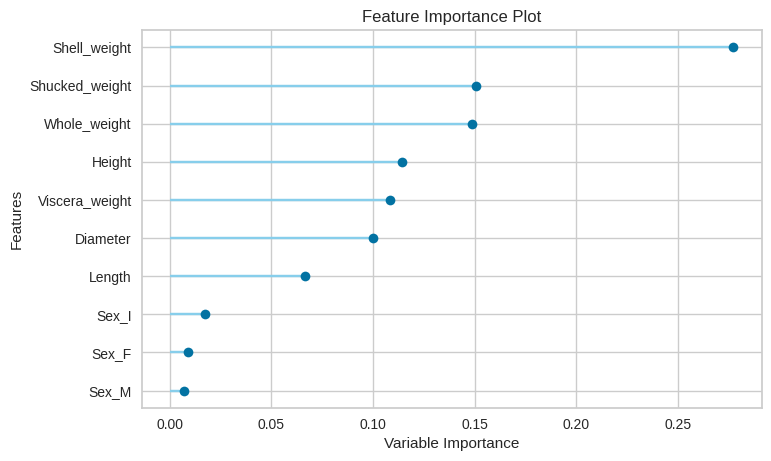

In [204]:
plot_model(tuned_gbr, plot='feature')

In [205]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [206]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Predict on Test / Hold-out Sample**

In [207]:
predict_model(tuned_lightgbm);

Model    MAE     MSE  ...      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  1.579  4.8888  ...  0.5322  0.1582  0.1357

[1 rows x 7 columns]

In [208]:
predict_model(tuned_gbr);

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Gradient Boosting Regressor  1.5772  4.8194  2.1953  0.5388  0.1598  0.1395

# **Finalize Model for Deployment**

In [209]:
final_gbr = finalize_model(tuned_gbr)

In [210]:
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [211]:
predict_model(final_gbr);

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Gradient Boosting Regressor  1.4372  3.9043  1.9759  0.6264  0.1446  0.1275

In [212]:
unseen_predictions = predict_model(gbr, data=data_unseen)
unseen_predictions.head()

Sex  Length  Diameter  Height  ...  Viscera_weight  Shell_weight  Rings      Label
0   F   0.530     0.415   0.150  ...          0.1415         0.330   21.5  13.845999
1   M   0.490     0.380   0.135  ...          0.0950         0.190   12.5  12.411148
2   F   0.470     0.355   0.100  ...          0.0805         0.185   11.5  11.846926
3   M   0.450     0.320   0.100  ...          0.0750         0.115   10.5  10.647779
4   F   0.615     0.480   0.165  ...          0.3010         0.305   11.5  11.917914

[5 rows x 10 columns]

# **Predict on Unseen Data**

In [213]:
unseen_predictions = predict_model(gbr, data=data_unseen)
unseen_predictions.head()

Sex  Length  Diameter  Height  ...  Viscera_weight  Shell_weight  Rings      Label
0   F   0.530     0.415   0.150  ...          0.1415         0.330   21.5  13.845999
1   M   0.490     0.380   0.135  ...          0.0950         0.190   12.5  12.411148
2   F   0.470     0.355   0.100  ...          0.0805         0.185   11.5  11.846926
3   M   0.450     0.320   0.100  ...          0.0750         0.115   10.5  10.647779
4   F   0.615     0.480   0.165  ...          0.3010         0.305   11.5  11.917914

[5 rows x 10 columns]

In [214]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Rings, unseen_predictions.Label, 'R2')

0.5454

# **Saving the Model**

In [215]:

save_model(final_gbr,'Final GBR Model 12Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Rings',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                            learning_rate=0.01, loss='ls',
                                            max_depth=7, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.05,
                       

# **Loading the Saved Model**

In [216]:

saved_final_gbr = load_model('Final GBR Model 12Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [217]:

new_prediction = predict_model(saved_final_gbr, data=data_unseen)

In [218]:
new_prediction.head()


Sex  Length  Diameter  Height  ...  Viscera_weight  Shell_weight  Rings      Label
0   F   0.530     0.415   0.150  ...          0.1415         0.330   21.5  14.672813
1   M   0.490     0.380   0.135  ...          0.0950         0.190   12.5  11.992571
2   F   0.470     0.355   0.100  ...          0.0805         0.185   11.5  11.836765
3   M   0.450     0.320   0.100  ...          0.0750         0.115   10.5  10.485116
4   F   0.615     0.480   0.165  ...          0.3010         0.305   11.5  11.810310

[5 rows x 10 columns]

In [219]:
from pycaret.utils import check_metric
check_metric(new_prediction.Rings, new_prediction.Label, 'R2')

0.5235